In [29]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay, matthews_corrcoef, roc_auc_score
from collections import Counter
from six import StringIO
import pydotplus
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [30]:
# IMPORT DATASET
df=pd.read_excel('dataLymphatics.xlsx')
df.columns = df.columns.str.strip().str.replace('-', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block_of_affere  148 non-null    int64
 3   bl._of_lymph._c  148 non-null    int64
 4   bl._of_lymph._s  148 non-null    int64
 5   by_pass          148 non-null    int64
 6   extravates       148 non-null    int64
 7   regeneration_of  148 non-null    int64
 8   early_uptake_in  148 non-null    int64
 9   lym.nodes_dimin  148 non-null    int64
 10  lym.nodes_enlar  148 non-null    int64
 11  changes_in_lym   148 non-null    int64
 12  defect_in_node   148 non-null    int64
 13  changes_in_node  148 non-null    int64
 14  changes_in_stru  148 non-null    int64
 15  special_forms    148 non-null    int64
 16  dislocation_of   148 non-null    int64
 17  exclusion_of_no  148 non-null    int64
 18  no._of_nod

In [31]:
# Ringkasan Data
df.describe()

,class,lymphatics,block_of_affere,bl._of_lymph._c,bl._of_lymph._s,by_pass,extravates,regeneration_of,early_uptake_in,lym.nodes_dimin,lym.nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no._of_nodes_in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [32]:
# Deteksi Missing Value
df.isna().sum()

class              0
lymphatics         0
block_of_affere    0
bl._of_lymph._c    0
bl._of_lymph._s    0
by_pass            0
extravates         0
regeneration_of    0
early_uptake_in    0
lym.nodes_dimin    0
lym.nodes_enlar    0
changes_in_lym     0
defect_in_node     0
changes_in_node    0
changes_in_stru    0
special_forms      0
dislocation_of     0
exclusion_of_no    0
no._of_nodes_in    0
dtype: int64

In [33]:
# Array of attribute
list_df_features=[]
for i in df:
    df_features=i
    list_df_features.append(df_features)
list_df_features

['class',
 'lymphatics',
 'block_of_affere',
 'bl._of_lymph._c',
 'bl._of_lymph._s',
 'by_pass',
 'extravates',
 'regeneration_of',
 'early_uptake_in',
 'lym.nodes_dimin',
 'lym.nodes_enlar',
 'changes_in_lym',
 'defect_in_node',
 'changes_in_node',
 'changes_in_stru',
 'special_forms',
 'dislocation_of',
 'exclusion_of_no',
 'no._of_nodes_in']

In [34]:
# Korelasi tiap atribut
df.corr()

,class,lymphatics,block_of_affere,bl._of_lymph._c,bl._of_lymph._s,by_pass,extravates,regeneration_of,early_uptake_in,lym.nodes_dimin,lym.nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no._of_nodes_in
class,1.000000,0.147550,-0.358447,-0.054812,0.212651,0.046761,0.118952,0.397742,0.255697,0.411953,0.258756,-0.181180,0.126130,0.033030,0.291371,0.377557,0.215118,0.232622,0.544329
lymphatics,0.147550,1.000000,0.084322,0.058310,0.109285,0.217326,0.136961,0.084832,0.085327,0.087863,0.208602,0.119311,0.150614,0.202660,-0.079649,0.102592,0.230786,0.082347,0.121657
block_of_affere,-0.358447,0.084322,1.000000,0.414163,0.199896,0.350223,0.338391,0.024882,0.011253,-0.086410,0.019828,0.295450,0.106347,0.198146,-0.067398,0.014942,-0.037284,0.039273,-0.088141
bl._of_lymph._c,-0.054812,0.058310,0.414163,1.000000,0.482650,0.565957,0.348904,0.300160,0.028347,0.080621,0.057554,0.051258,0.100094,0.119139,0.068744,0.008984,0.104504,0.150359,0.199805
bl._of_lymph._s,0.212651,0.109285,0.199896,0.482650,1.000000,0.393004,0.219822,0.447273,0.005647,0.262217,0.064485,0.011771,0.119046,0.099426,0.139536,0.069145,0.159152,0.114690,0.398857
by_pass,0.046761,0.217326,0.350223,0.565957,0.393004,1.000000,0.433337,0.412066,0.024212,0.242446,0.056153,0.101449,0.204120,0.084089,-0.049369,0.103318,0.171884,0.137024,0.293236
extravates,0.118952,0.136961,0.338391,0.348904,0.219822,0.433337,1.000000,0.157891,0.038359,0.105490,0.186838,0.193305,0.195745,0.065788,-0.076293,0.194895,0.095376,0.189623,0.234184
regeneration_of,0.397742,0.084832,0.024882,0.300160,0.447273,0.412066,0.157891,1.000000,-0.060487,0.550613,0.008726,-0.189464,0.072724,-0.001437,0.047740,0.128225,0.021535,0.072411,0.425165
early_uptake_in,0.255697,0.085327,0.011253,0.028347,0.005647,0.024212,0.038359,-0.060487,1.000000,-0.157259,0.422155,0.170705,0.008772,0.163128,0.126469,0.316225,0.254264,0.210115,0.291669
lym.nodes_dimin,0.411953,0.087863,-0.086410,0.080621,0.262217,0.242446,0.105490,0.550613,-0.157259,1.000000,-0.317841,-0.327835,-0.017389,-0.263035,0.090464,0.000566,-0.089577,-0.006103,0.257242


In [35]:
# Data Training
X= [2, 14,15,11, 10, 13]
X=df.loc[:, df.columns[X]]

X

,block_of_affere,changes_in_stru,special_forms,changes_in_lym,lym.nodes_enlar,changes_in_node
0,2,8,1,2,2,4
1,2,4,2,3,3,3
2,2,8,3,3,4,4
3,1,4,3,3,3,4
4,1,5,1,2,2,3
...,...,...,...,...,...,...
143,2,5,2,2,2,3
144,1,3,1,1,1,1
145,2,8,3,3,3,3
146,1,2,1,2,2,2


In [36]:
# Data Testing
y= [1]
y=df.loc[:, df.columns[y]]

y

,lymphatics
0,4
1,3
2,3
3,3
4,3
...,...
143,3
144,2
145,2
146,2


In [37]:
#train test split (30) test_size = 0.2
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=False, stratify = y)



#train test split (10) test_size = 0.4
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=False, stratify = y)

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

TRAIN 80, TESTING 20

In [38]:
#Random Forest Model
dt = RandomForestClassifier()
dt.fit(X_train_20,y_train_20)
print("score: ", dt.score(X_train_20,y_train_20))

score:  0.9067796610169492


c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [39]:
# Random Forest
print("Random Forest")
Forest = RandomForestClassifier(random_state=42)
Forest.fit(X_train_20, y_train_20.values.ravel())
y_predictionRF = Forest.predict(X_test_20)
accuracy_RF = round(accuracy_score(y_test_20, y_predictionRF)* 100, 2)
acc_DecisionRF = round(Forest.score(X_train_20, y_train_20)* 100, 2)
print("Prediksi Random Forest : ", y_predictionRF)

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Random Forest
Prediksi Random Forest :  [3 4 2 2 2 2 2 4 4 2 2 2 2 2 4 2 4 2 4 2 3 2 3 3 4 2 2 3 2 2]


c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [40]:
# Confusion Matrix Random Forest
CMRF = confusion_matrix(y_test_20, y_predictionRF)
accuracyRF = accuracy_score(y_test_20, y_predictionRF)
precisionRF = precision_score(y_test_20, y_predictionRF, average='macro')
recallRF = recall_score(y_test_20, y_predictionRF, average='macro')
f1RF = f1_score(y_test_20, y_predictionRF, average='macro')
mccRF = matthews_corrcoef(y_test_20, y_predictionRF)

TNRF = CMRF[1][1] * 1.0
FNRF = CMRF[1][0] * 1.0
TPRF = CMRF[0][0] * 1.0
FPRF = CMRF[0][1] * 1.0
total = TNRF + TPRF + FPRF + FNRF
sensitivityRF = TNRF / (TNRF + FPRF)* 100
specificityRF = TPRF / (TPRF + FNRF)* 100

print("Akurasi Random Forest: ", accuracyRF)
print("Recall Random Forest: ", recallRF)
print("Specifity Random Forest: ", specificityRF)
print("Precision Random Forest: ", precisionRF)
print("MCC Random Forest: ", mccRF)
print("F-Measure Random Forest: ", f1RF)


Akurasi Random Forest:  0.43333333333333335
Recall Random Forest:  0.3941798941798942
Specifity Random Forest:  60.0
Precision Random Forest:  0.3761904761904762
MCC Random Forest:  0.08196810063200355
F-Measure Random Forest:  0.3779761904761905


c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

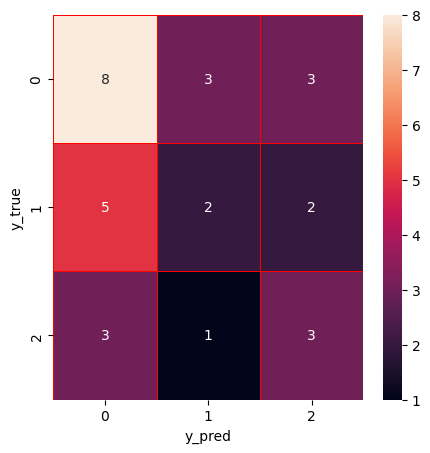

In [50]:
y_pred = Forest.predict(X_test_20)
y_true = y_test_20
cm = confusion_matrix(y_true,y_pred)
# VISUALIZATION
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

TRAIN 70, TESTING 30

In [51]:
#train test split (10) test_size = 0.3
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=False, stratify = y)

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [52]:
# Random Forest
print("Random Forest")
Forest = RandomForestClassifier(random_state=42)
Forest.fit(X_train_30, y_train_30.values.ravel())
y_predictionRF = Forest.predict(X_test_30)
accuracy_RF = round(accuracy_score(y_test_30, y_predictionRF)* 100, 2)
acc_DecisionRF = round(Forest.score(X_train_30, y_train_30)* 100, 2)
print("Prediksi Random Forest : ", y_predictionRF)

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Random Forest
Prediksi Random Forest :  [2 4 2 2 2 2 2 3 3 4 3 2 4 3 3 3 3 3 2 4 2 4 2 2 2 4 4 4 4 2 2 2 4 2 2 2 2
 3 2 2 4 2 3 2 4]


c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [53]:
# Confusion Matrix Random Forest
CMRF = confusion_matrix(y_test_30, y_predictionRF)
accuracyRF = accuracy_score(y_test_30, y_predictionRF)
precisionRF = precision_score(y_test_30, y_predictionRF, average='macro')
recallRF = recall_score(y_test_30, y_predictionRF, average='macro')
f1RF = f1_score(y_test_30, y_predictionRF, average='macro')
mccRF = matthews_corrcoef(y_test_30, y_predictionRF)

TNRF = CMRF[1][1] * 1.0
FNRF = CMRF[1][0] * 1.0
TPRF = CMRF[0][0] * 1.0
FPRF = CMRF[0][1] * 1.0
total = TNRF + TPRF + FPRF + FNRF
sensitivityRF = TNRF / (TNRF + FPRF)* 100
specificityRF = TPRF / (TPRF + FNRF)* 100

print("Akurasi Random Forest: ", accuracyRF)
print("Recall Random Forest: ", recallRF)
print("Specifity Random Forest: ", specificityRF)
print("Precision Random Forest: ", precisionRF)
print("MCC Random Forest: ", mccRF)
print("F-Measure Random Forest: ", f1RF)

Akurasi Random Forest:  0.4222222222222222
Recall Random Forest:  0.3214285714285714
Specifity Random Forest:  nan
Precision Random Forest:  0.31286231884057975
MCC Random Forest:  0.10469659716875547
F-Measure Random Forest:  0.3132487667371388


c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pgnat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

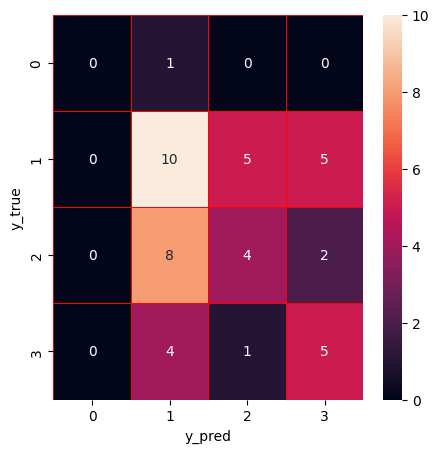

In [54]:
y_pred = Forest.predict(X_test_30)
y_true = y_test_30
cm = confusion_matrix(y_true,y_pred)
# VISUALIZATION
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

TRAINING 60, TESTING 40